In [2]:
#imports

# general imports
from IPython.display import display, Markdown #just to display markdown
import numpy as np
import cv2

#keras import 
from keras import Input, layers
from keras.models import Sequential, Model
from keras import applications

# visualiaztion imports
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


## A multi-input model

### multi input model
![title](./pics/multi-input-model.png)

In [3]:
def plot_model_training_history(history,accuracy = True,val_loss =True):
    
    #collecting all post-training values 
    if accuracy:
        acc = history.history['acc']
        if val_loss:
            val_acc = history.history['val_acc']
    
    loss = history.history['loss']
    
    if val_loss:
        val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    # ploting losses
    plt.plot(epochs, loss, 'bo', label='Training loss')
    if val_loss:
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
    plt.figure()
    
    if accuracy:
        # ploting accuracies
        plt.plot(epochs, acc, 'bo', label='Training acc')
        if val_acc:
            plt.plot(epochs, val_acc, 'b', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.legend()
    return

def plot_large_image_without_borders(path_to_image):
    # change the figure size
    fig2 = plt.figure(figsize = (15,15)) # create a 5 x 5 figure 
    ax3 = fig2.add_subplot(111)
    ax3.imshow(cv2.imread(path_to_image), interpolation='none')
    plt.axis('off')
    plt.show()

### The functional API equivalent to a Sequential model

### a sequential model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________
None


### functional API equivalent

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


### Training models built with the functional API

Epoch 1/10
1000/1000 [==============================] - 1s 637us/step - loss: 11.5796
Epoch 2/10
1000/1000 [==============================] - 0s 17us/step - loss: 11.5248
Epoch 3/10
1000/1000 [==============================] - 0s 18us/step - loss: 11.5137
Epoch 4/10
1000/1000 [==============================] - 0s 20us/step - loss: 11.5066
Epoch 5/10
1000/1000 [==============================] - 0s 21us/step - loss: 11.5022
Epoch 6/10
1000/1000 [==============================] - 0s 20us/step - loss: 11.4987
Epoch 7/10
1000/1000 [==============================] - 0s 21us/step - loss: 11.4961
Epoch 8/10
1000/1000 [==============================] - 0s 21us/step - loss: 11.4943
Epoch 9/10
1000/1000 [==============================] - 0s 20us/step - loss: 11.4921
Epoch 10/10
1000/1000 [==============================] - 0s 21us/step - loss: 11.4900


### results

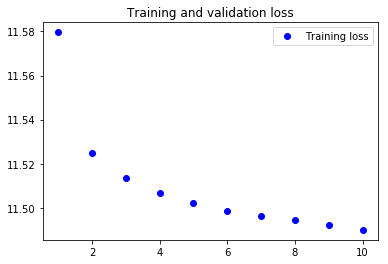

<Figure size 432x288 with 0 Axes>

In [4]:
display(Markdown("### a sequential model"))
seq_model = Sequential()
seq_model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))
print (seq_model.summary())


display(Markdown("### functional API equivalent"))
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)
# The Model class turns an input tensor and output tensor into a model
model = Model(input_tensor, output_tensor)
# Let's look at it!
model.summary()

display(Markdown("### Training models built with the functional API"))
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
# Generate random Numpy data to train on
x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))
# Train the model for 10 epochs
history = model.fit(x_train, y_train, epochs=10, batch_size=128)

print (history)
display(Markdown("### results"))
plot_model_training_history(history,accuracy=False,val_loss=False)

### A question-answering model

## A question-answering model

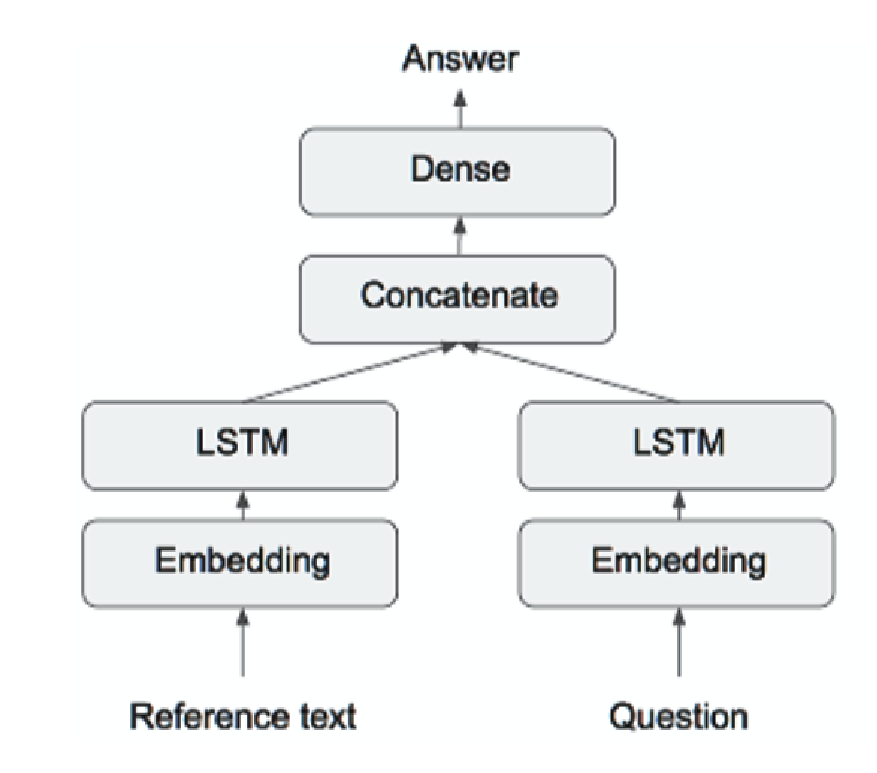

starting model architecture development...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               (None, 20)           0                                            
__________________________________________________________________________________________________
question (InputLayer)           (None, 20)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 20, 64)       640000      text[0][0]                       
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 20, 32)       320000      question[0][0]                   
__________________________________________________________________

In [4]:
plot_large_image_without_borders("./pics/QA-pic.png")

# model architecture and training
print("starting model architecture development...")

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500
num_samples = 10000
max_length = 20

# Our text input is a variable-length sequence of integers.
# Note that we can optionally name our inputs!
text_input = Input(shape=(max_length,), dtype='int32', name='text')
# Which we embed into a sequence of vectors of size 64
embedded_text = layers.Embedding(text_vocabulary_size, 64)(text_input)
# Which we encoded in a single vector via a LSTM
encoded_text = layers.LSTM(32)(embedded_text)


# Same process (with different layer instances) for the question
question_input = Input(shape=(max_length,), dtype='int32', name='question')
embedded_question = layers.Embedding(question_vocabulary_size, 32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)


# We then concatenate the encoded question and encoded text
concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)
# And we add a softmax classifier on top
answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)

# At model instantiation, we specify the two inputs and the output:
model = Model([text_input,question_input], [answer])
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
model.summary()

### Creating dummy data & question-answer training

In [62]:
# Let's generate some dummy Numpy data
text = np.random.randint(1, text_vocabulary_size, size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size, size=(num_samples, max_length))
# Answers are one-hot encoded, not integers
answers = np.random.randint(0, 1, size=(num_samples, answer_vocabulary_size))

# understanding input & output shapes
print ("\nShape of text data: {}".format(text.shape))
print ("Shape of questions data: {}".format(question.shape))
print ("Shape of answers data: {}\n".format(answers.shape))

# Fitting using a list of inputs
history = model.fit([text,question], answers, epochs=5, batch_size=32)

### --- Fitting using a dictionary of inputs (only if inputs were named!) -- ###
#   model.fit({'text': text, 'question': question}, answers,                   #
#              epochs=10, batch_size=128)                                      #
#                     '                                                        #
################################################################################                                                      ##

### creating dummy data & question-answer training


Shape of text data: (10000, 20)
Shape of questions data: (10000, 20)
Shape of answers data: (10000, 500)

Epoch 1/5
10000/10000 [==============================] - 18s 2ms/step - loss: 0.0000e+00 - acc: 0.0013
Epoch 2/5
10000/10000 [==============================] - 19s 2ms/step - loss: 0.0000e+00 - acc: 0.0013
Epoch 3/5
10000/10000 [==============================] - 20s 2ms/step - loss: 0.0000e+00 - acc: 0.0013
Epoch 4/5
10000/10000 [==============================] - 20s 2ms/step - loss: 0.0000e+00 - acc: 0.0013
Epoch 5/5
10000/10000 [==============================] - 20s 2ms/step - loss: 0.0000e+00 - acc: 0.0013


### Functional API implementation of a three-output model

In [79]:
vocabulary_size = 50000
num_income_groups = 10

# model architecture and training
print("starting model architecture development...")
input_posts = Input(shape=(300,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(vocabulary_size,256)(input_posts)
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

# Note that we are giving names to the output layers.
age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups, activation='softmax', name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)

# Data-set is not avaiable its just dummy code
model = Model(input_posts, [age_prediction, income_prediction, gender_prediction])
model.summary()
print("\n")

# Compilation options of a multi-output model with multi losses & loss weighting
model.compile(optimizer='rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
              loss_weights=[0.25, 1., 10.])

### -- Equivalent (only possible if you gave names to the output layers!) -- ###
#   model.compile(optimizer='rmsprop',                                         #
#              loss={'age': 'mse',                                             #
#                     'income': 'categorical_crossentropy',                    #
#                     'gender': 'binary_crossentropy'},                        #
#               loss_weights={'age': 0.25,                                     #
#                             'income': 1.,                                    #
#                             'gender': 10.})                                  #
################################################################################


#feeding data to multi output model

# age_targets, income_targets and gender_targets are assumed to be Numpy arrays
model.fit(posts, [age_targets, income_targets, gender_targets],epochs=10, batch_size=64)
                  
### -- Equivalent (only possible if you gave names to the output layers!) -- ###
#   model.fit(posts, {'age': age_targets,                                      #
#              'income': income_targets,                                       #
#              'gender': gender_targets},                                      #
#               epochs=10, batch_size=64)                                      #
################################################################################

## Functional API implementation of a three-output model

starting model architecture development...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_76 (Embedding)        (None, 300, 256)     12800000    posts[0][0]                      
__________________________________________________________________________________________________
conv1d_59 (Conv1D)              (None, 296, 128)     163968      embedding_76[0][0]               
__________________________________________________________________________________________________
max_pooling1d_27 (MaxPooling1D) (None, 59, 128)      0           conv1d_59[0][0]                  
__________________________________________________________________

### Implementing an Inception module with the functional API

## Implementing an Inception module with the functional API

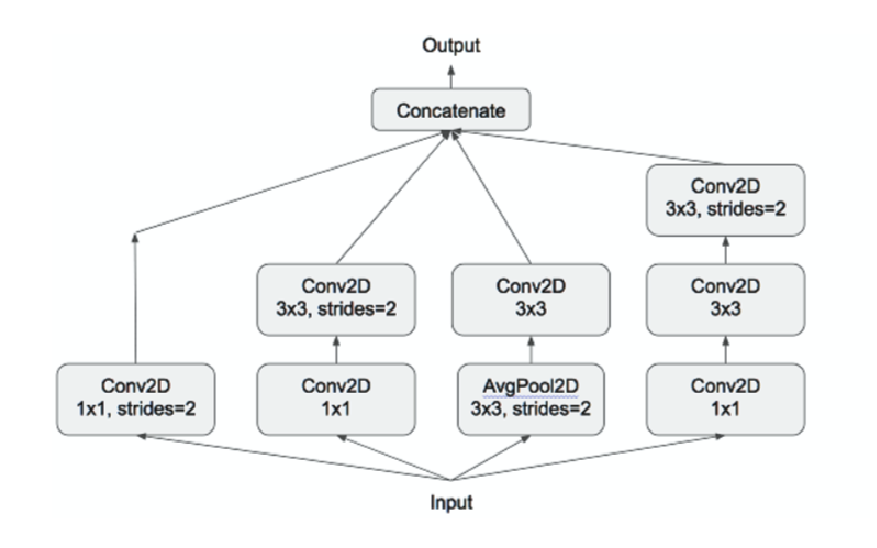

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 64, 64, 128)  512         input_image[0][0]                
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 128)  512         input_image[0][0]                
__________________________________________________________________________________________________
average_pooling2d_1 (AveragePoo (None, 32, 32, 3)    0           input_image[0][0]                
__________________________________________________________________________________________________
conv2d_6 (

In [5]:
### inception layer
plot_large_image_without_borders("./pics/inception-module.png")

# We assume the existence of a 4D input tensor `x`
# Every branch has the same stride value (2), which is necessary to keep all
# branch outputs the same size, so as to be able to concatenate them.

x = Input(shape=(64,64,3),dtype="float32",name="input_image")

branch_a = layers.Conv2D(128, 1, activation='relu', strides=2, padding="same")(x)

# In this branch, the striding occurs in the spatial convolution layer
branch_b = layers.Conv2D(128, 1, activation='relu',padding="same")(x)
branch_b = layers.Conv2D(128, 3, activation='relu', strides=2,padding="same")(branch_b)

# In this branch, the striding occurs in the average pooling layer
branch_c = layers.AveragePooling2D(2, strides=2)(x)    #### NEEDS SOME CORRECTION ###
branch_c = layers.Conv2D(128, 3, activation='relu',padding="same")(branch_c)

branch_d = layers.Conv2D(128, 1, activation='relu',padding="same")(x)
branch_d = layers.Conv2D(128, 3, activation='relu',padding="same")(branch_d)
branch_d = layers.Conv2D(128, 3, activation='relu', strides=2,padding="same")(branch_d)
# Finally, we concatenate the branch outputs to obtain the module output
output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis=-1)

inception_module = Model(x, [output])
inception_module.summary()

# NOTE: that the full Inception V3 architecture is available in Keras as keras.applications.inception_v3.InceptionV3

### Implementing a residual connection when feature map sizes differ

## Implementing a residual connection when feature map sizes differ

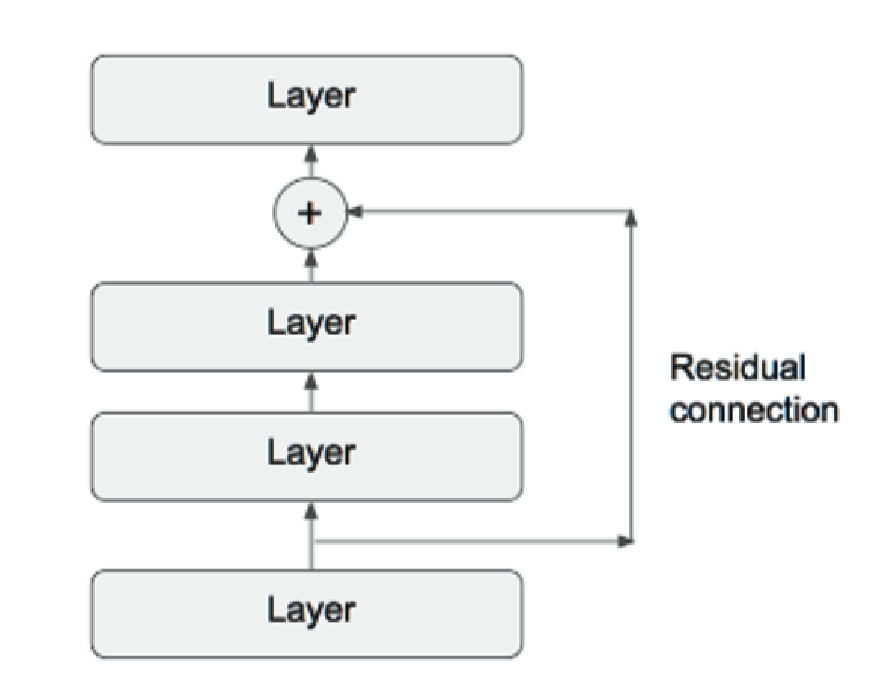

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 64, 64, 128)  3584        input_image[0][0]                
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 64, 64, 128)  147584      conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 128)  0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
down_sampl

In [6]:
plot_large_image_without_borders("./pics/residual-module.png")    

# We assume the existence of a 4D input tensor `x`
x = Input(shape=(64,64,3),dtype="float32",name="input_image")
y = layers.Conv2D(128, 3, activation='relu',padding="same")(x)
y = layers.Conv2D(128, 3, activation='relu',padding="same")(y)
y = layers.MaxPooling2D(2, strides=2)(y)

# We use a 1x1 convolution to linearly downsample
# the original `x` tensor to the same shape as `y`
residual = layers.Conv2D(128, 1, strides=2,name="down_sampling_input")(x)

# We add the residual tensor back to the output features
y = layers.add([y, residual],name="residual_addition")

residual_module = Model(x,[y])
residual_module.summary()

### Layer weight sharing (i.e. layer reuse): implementing a siamese LSTM model

In [7]:
input_length = 10

# We instantiate a single LSTM layer, once
lstm = layers.LSTM(32,name="shared_layer")
# Building the left branch of the model
# -------------------------------------
# Inputs are variable-length sequences of vectors of size 128
left_input = Input(shape=(input_length, 128),name="left_input")
left_output = lstm(left_input)
# Building the right branch of the model
# --------------------------------------
right_input = Input(shape=(input_length, 128),name="right_input")
# When we call an existing layer instance,
# we are reusing its weights
right_output = lstm(right_input)
# Building the classifier on top
# ------------------------------
merged = layers.concatenate([left_output, right_output], axis=-1,name="combining_layer")
predictions = layers.Dense(1, activation='sigmoid')(merged)
# Instantiating and training the model
# ------------------------------------
model = Model([left_input, right_input], predictions)
model.summary()
# When you train such a model, the weights of the `lstm` layer
# are updated based on both inputs.
# model.fit([left_data, right_data], targets)

### Layer weight sharing (i.e. layer reuse): implementing a siamese LSTM model

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
left_input (InputLayer)         (None, 10, 128)      0                                            
__________________________________________________________________________________________________
right_input (InputLayer)        (None, 10, 128)      0                                            
__________________________________________________________________________________________________
shared_layer (LSTM)             (None, 32)           20608       left_input[0][0]                 
                                                                 right_input[0][0]                
__________________________________________________________________________________________________
combining_layer (Concatenate)   (None, 64)           0           shared_layer[0][0]               
          

### Implementing a siamese vision model (shared convolutional base)

In [8]:
# Our base image processing model with be the Xception network
# (convolutional base only).
xception_base = applications.Xception(weights=None, include_top=False)

# Our inputs are 250x250 RGB images.
left_input = Input(shape=(250, 250, 3))
right_input = Input(shape=(250, 250, 3))

# We call the same vision model twice!
left_features = xception_base(left_input)
right_input = xception_base(right_input)

# # The merged features contain information from both
# # the right visual feed and the left visual feed
merged_features = layers.concatenate([left_features, right_input], axis=-1)